# 애니메이션 캐릭터 이미지 사진으로 닮은 캐릭터 예측하기

## 이미지 크롤링

In [ ]:
# 참고 사이트
- https://crmn.tistory.com/50
- https://wikidocs.net/29530
- https://www.remove.bg/ko/upload?source=navbar

In [78]:
# 모듈 로딩
from urllib.request import urlopen,Request,urlretrieve
from bs4 import BeautifulSoup
from selenium import webdriver
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np 

In [10]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('C:/Users/whrjs/PycharmProjects/exam\day_0725/chromedriver.exe')
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./project2/'+charname):
        os.makedirs(charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./project2/'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./project2/'+charname):
        Image.open('./project2/'+charname+'/'+png).resize((40,40)).save('./project2/'+charname+'/'+png)

In [164]:
# 피카츄
image_save('https://www.google.com/search?q=pickachu+png&tbm=isch&ved=2ahUKEwjU_7Gp-4P6AhUKEZQKHeThBnAQ2-cCegQIABAA&oq=pickachu+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAUQE1D0Blj0BmDTD2gAcAB4AIABpQKIAaoEkgEDMi0ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=hDoZY9StL4qi0ATkw5uABw&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','pikachu')

C:\Users\whrjs\AppData\Local\Temp\ipykernel_26260\910340126.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/whrjs/PycharmProjects/exam\day_0725/chromedriver.exe')


In [9]:
# 나미
image_save('https://www.google.com/search?q=onepiece+nami+png&tbm=isch&ved=2ahUKEwiXh9-Y-oP6AhVNAKYKHeUGBgMQ2-cCegQIABAA&oq=onepiece+nami+png&gs_lcp=CgNpbWcQAzoFCAAQgAQ6BggAEB4QB1CpB1ixImC4JmgBcAB4AYABlASIAeUVkgEKMS4xMC4yLjUtMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=VTkZY9eIGs2AmAXljZgY&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','nami')

# 이슬이
image_save('https://www.google.com/search?q=pokemon+kasumi+png&tbm=isch&ved=2ahUKEwitw7K_-oP6AhVBFYgKHXNmDzMQ2-cCegQIABAA&oq=pokemon+kasumi+png&gs_lcp=CgNpbWcQAzoFCAAQgAQ6BggAEB4QBzoICAAQgAQQsQM6BAgAEBM6CAgAEB4QBxATUJsIWMZAYOZCaARwAHgAgAG-AogBxx6SAQgwLjE3LjMuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=pjkZY63YHcGqoATzzL2YAw&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','kasumi')

# 모리 란
image_save('https://www.google.com/search?q=mori+ran+png&tbm=isch&ved=2ahUKEwiTpJjJ-oP6AhUERvUHHaCiBkIQ2-cCegQIABAA&oq=mori+ran+png&gs_lcp=CgNpbWcQAzIICAAQHhAIEAcyCAgAEB4QCBAHMggIABAeEAgQBzoECAAQEzoICAAQHhAHEBNQuQdY-hNglxVoAHAAeACAAdYBiAHyC5IBBTAuNi4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=uzkZY9PaAYSM1e8PoMWakAQ&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','ran')

# 하이바라 아이
image_save('https://www.google.com/search?q=haibara+ai+png&tbm=isch&ved=2ahUKEwiNoubY-oP6AhWSA94KHblpA8EQ2-cCegQIABAA&oq=haibara+ai+png&gs_lcp=CgNpbWcQAzIECAAQE1CHBliHBmDVC2gAcAB4AIAB2AGIAZoDkgEFMC4xLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=2zkZY83ILpKH-Aa5042IDA&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','haibara')

# 쿠시나
image_save('https://www.google.com/search?q=kusina+png&tbm=isch&ved=2ahUKEwjM0Lnb-oP6AhVOeN4KHf-gDxEQ2-cCegQIABAA&oq=kusina+png&gs_lcp=CgNpbWcQAzIECAAQEzoFCAAQgAQ6BggAEB4QBzoICAAQHhAHEBNQ9wZYxw9g_hFoAHAAeACAAdIBiAHFCpIBBTAuNS4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=4TkZY4zcE87w-Qb_wb6IAQ&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','kusina')

# 란기쿠
image_save('https://www.google.com/search?q=rangiku+png&tbm=isch&ved=2ahUKEwjevs3j-oP6AhWhSfUHHQtvBIsQ2-cCegQIABAA&oq=rangiku+png&gs_lcp=CgNpbWcQAzoECAAQE1DeAljeAmD7BmgAcAB4AIAB0QKIAbcEkgEFMi0xLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=8jkZY979GaGT1e8Pi96R2Ag&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','rangiku')

# 사쿠라
image_save('https://www.google.com/search?q=cardcaptor+sakura+png&tbm=isch&ved=2ahUKEwiXmqr_-oP6AhWCAaYKHQALDkYQ2-cCegQIABAA&oq=cardcaptor+sakura+png&gs_lcp=CgNpbWcQAzIFCAAQgAQyBggAEB4QBzIGCAAQHhAHMgYIABAeEAcyBggAEB4QBzIGCAAQHhAHMgYIABAeEAcyBggAEB4QBzIGCAAQHhAHMgYIABAeEAc6BAgAEBM6CAgAEB4QBxATOggIABCABBCxA1CKB1juM2CDOWgDcAB4AIABrQKIAZgYkgEIMC4xMS40LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=LDoZY5fUIoKDmAWAlriwBA&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','sakura')

# 지수
image_save('https://www.google.com/search?q=daidouuji+tomoyo+png&tbm=isch&ved=2ahUKEwjJ6vSS-oP6AhVzxIsBHSBBDZ4Q2-cCegQIABAA&oq=daidouuji+tomoyo+png&gs_lcp=CgNpbWcQA1CBBlj7B2DDCWgAcAB4AIABsgGIAd0CkgEDMC4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=STkZY4miDPOIr7wPoIK18Ak&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','tomoyo')

# 치치
image_save('https://www.google.com/search?q=chichi+png&tbm=isch&ved=2ahUKEwiCz4uJ-4P6AhVRxosBHfEtB2QQ2-cCegQIABAA&oq=chichi+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAcQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAcQEzoFCAAQgAQ6BAgAEB46BggAEB4QCDoGCAAQHhAHUNsOWNsOYIMXaABwAHgAgAGvAYgB0AKSAQMwLjKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=QToZY8KqAtGMr7wP8ducoAY&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','chichi')

# 루피
image_save('https://www.google.com/search?q=pororo+luffy+png&tbm=isch&ved=2ahUKEwiw7KCV-4P6AhUNhZQKHZXEBdEQ2-cCegQIABAA&oq=pororo+luffy+png&gs_lcp=CgNpbWcQAzoECAAQEzoICAAQHhAIEBNQ7gNYmSJguyRoAXAAeACAAbsBiAGDCZIBAzAuN5gBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=WjoZY7DXIY2K0gSViZeIDQ&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','pororo_luffy')

C:\Users\whrjs\AppData\Local\Temp\ipykernel_26260\910340126.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/whrjs/PycharmProjects/exam\day_0725/chromedriver.exe')


In [11]:
# 루피
image_save('https://www.google.com/search?q=onepiece+luffy+png&tbm=isch&ved=2ahUKEwiNtPic-4P6AhUKzosBHQU4CqYQ2-cCegQIABAA&oq=onepiece+luffy+png&gs_lcp=CgNpbWcQAzIECAAQEzoGCAAQHhAHOgYIABAeEAhQkwhY1jRgtDZoAnAAeACAAcwCiAGPFJIBBzAuMi44LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=ajoZY43XKIqcr7wPhfCosAo&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','luffy')

# 피카츄
image_save('https://www.google.com/search?q=pickachu+png&tbm=isch&ved=2ahUKEwjU_7Gp-4P6AhUKEZQKHeThBnAQ2-cCegQIABAA&oq=pickachu+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAUQE1D0Blj0BmDTD2gAcAB4AIABpQKIAaoEkgEDMi0ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=hDoZY9StL4qi0ATkw5uABw&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','pikachu')

# 아구몬
image_save('https://www.google.com/search?q=agumon+png&tbm=isch&ved=2ahUKEwj5mPCx-4P6AhU-zYsBHZU2DAEQ2-cCegQIABAA&oq=agumon+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBRATMggIABAeEAUQEzoICAAQHhAIEBNQzAVYzAVgiAloAHAAeACAAbsBiAHxApIBAzAuMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=ljoZY_n1Ir6ar7wPle2wCA&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','agumon')

# 우디
image_save('https://www.google.com/search?q=woody+png&tbm=isch&ved=2ahUKEwjc1aWi5YP6AhVIc5QKHWOLB8kQ2-cCegQIABAA&oq=woody+png&gs_lcp=CgNpbWcQAzIFCAAQgAQyBggAEB4QBzIGCAAQHhAHMgYIABAeEAcyBggAEB4QBzIGCAAQHhAHMgYIABAeEAcyBggAEB4QBzIGCAAQHhAHMgYIABAeEAdQ-wdY-wdgzQ1oAHAAeACAAfcBiAGtA5IBBTAuMS4xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=ZCMZY9yTE8jm0QTjlp7IDA&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','woody')

# 유우기
image_save('https://www.google.com/search?q=yugi+png&tbm=isch&ved=2ahUKEwiOrZLK-4P6AhV_yYsBHdFcDfQQ2-cCegQIABAA&oq=yugi+png&gs_lcp=CgNpbWcQAzIECAAQEzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAcQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAcQEzIICAAQHhAHEBMyCAgAEB4QBxATOgUIABCABDoGCAAQHhAHOggIABCABBCxA1D9BlivDmC7EWgAcAB4AIAB1wGIAfMFkgEFMC4zLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=yToZY86kHP-Sr7wP0bm1oA8&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','yugi')

# 해피
image_save('https://www.google.com/search?q=fairytail+happy+png&tbm=isch&ved=2ahUKEwjT0ova-4P6AhV6z4sBHes2BzUQ2-cCegQIABAA&oq=fairytail+happy+png&gs_lcp=CgNpbWcQA1C0AViSBGC3BWgAcAB4AIABlAOIAZQDkgEDNC0xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=6joZY9O1N_qer7wP6-2cqAM&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','happy')

# 소요
image_save('https://www.google.com/search?q=hinata+shoyo+png&tbm=isch&ved=2ahUKEwjxnrzo-4P6AhXMG6YKHWnqDKwQ2-cCegQIABAA&oq=hinata+shoyo+png&gs_lcp=CgNpbWcQAzIECAAQEzIECAAQEzIECAAQEzIECAAQEzIECAAQEzIECAAQEzIECAAQEzIGCAAQHhATMggIABAeEAUQEzIICAAQHhAFEBM6BAgAEB5QygZYygZgkwxoAHAAeACAAcQCiAH5A5IBBzAuMS4wLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=CTsZY7H2A8y3mAXp1LPgCg&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','shoyo')

# 펭수
image_save('https://www.google.com/search?q=pengsoo+png&tbm=isch&ved=2ahUKEwjR6a34-4P6AhUGEJQKHYhdAgcQ2-cCegQIABAA&oq=pengsoo+png&gs_lcp=CgNpbWcQAzIFCAAQgAQ6BggAEB4QB1CXFViAGWCFIGgAcAB4AIABtQGIAZEFkgEDMC40mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=KjsZY9GsF4ag0ASIu4k4&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','pengsoo')

# 손오공
image_save('https://www.google.com/search?q=songoku+png&tbm=isch&ved=2ahUKEwiXm8T--4P6AhUOv5QKHYLoD7MQ2-cCegQIABAA&oq=songoku+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBRATOgUIABCABFCyBFiyBGCkB2gAcAB4AIABuAGIAesCkgEDMC4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=NzsZY9ejFI7-0gSC0b-YCw&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','songoku')

# 크롱
image_save('https://www.google.com/search?q=crong+png&tbm=isch&ved=2ahUKEwjLzKmH_IP6AhUFxosBHfDOCioQ2-cCegQIABAA&oq=crong+png&gs_lcp=CgNpbWcQAzIECAAQEzIICAAQHhAHEBMyCAgAEB4QBxATMggIABAeEAgQEzoFCAAQgAQ6BggAEB4QB1DxBliiD2D0FWgAcAB4AIABugGIAY8IkgEDMC42mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=STsZY4uEL4WMr7wP8J2r0AI&bih=892&biw=1920&rlz=1C1CHZN_koKR1011KR1011&hl=ko','crong')

C:\Users\whrjs\AppData\Local\Temp\ipykernel_26260\910340126.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/whrjs/PycharmProjects/exam\day_0725/chromedriver.exe')


In [79]:
# 배열 변환
input=np.array([[0]*1600])
target=[]
for fold in os.listdir('./'):
    if fold=='gy2.ipynb':
        continue
    else:
        for file in os.listdir('./'+fold):
            target.append(fold)
            im=cv2.imread('./'+fold+'/'+file)
            black=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            black_arr=black.reshape(-1,40*40)
            input=np.row_stack((input,black_arr))

In [80]:
# 훈련가능하게 데이터 변환하기
input_arr=input[1:]
target_arr=np.array(target)

In [81]:
# 타겟데이터를 수치형으로
target_num=[]
target_uni=['agumon']
n=0
com='agumon'
for tar in target:
    if com==tar:
        target_num.append(n)
    else:
        n+=1
        com=tar
        target_num.append(n)
        target_uni.append(tar)
target_num_arr=np.array(target_num)

In [82]:
# 훈련/테스트 데이터 나누기
train_input,test_input,train_target,test_target=train_test_split(input_arr,target_num_arr,random_state=42,stratify=target_num_arr)

## 로지스틱 회귀

In [83]:
logicreg=LogisticRegression().fit(train_input,train_target)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
print(f"train 평가 점수 {logicreg.score(train_input,train_target)}")
print(f"test 평가 점수 {logicreg.score(test_input,test_target)}")

train 평가 점수 1.0
test 평가 점수 0.3805309734513274


In [85]:
# 최적화 모델 찾아보기
models=all_estimators(type_filter='classifier')

names=[]
train_scores=[]
test_scores=[]
for name,model in models:
    print(name)
    try:
        md=model() # 객체 생성
        md.fit(train_input,train_target) # 학습
        names.append(name)
        print(md.score(train_input,train_target),md.score(test_input,test_target),sep='    ')
    except Exception as e:
        print(e)

AdaBoostClassifier
0.14285714285714285    0.1415929203539823
BaggingClassifier
0.9970238095238095    0.3274336283185841
BernoulliNB
0.14583333333333334    0.07964601769911504
CalibratedClassifierCV


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9642857142857143    0.3008849557522124
CategoricalNB
0.8452380952380952    0.17699115044247787
ClassifierChain
__init__() missing 1 required positional argument: 'base_estimator'
ComplementNB
0.5089285714285714    0.2831858407079646
DecisionTreeClassifier
1.0    0.23008849557522124
DummyClassifier
0.0744047619047619    0.07079646017699115
ExtraTreeClassifier
1.0    0.1504424778761062
ExtraTreesClassifier
1.0    0.48672566371681414
GaussianNB
0.6607142857142857    0.22123893805309736
GaussianProcessClassifier
1.0    0.08849557522123894
GradientBoostingClassifier
1.0    0.36283185840707965
HistGradientBoostingClassifier
1.0    0.48672566371681414
KNeighborsClassifier
0.40476190476190477    0.21238938053097345
LabelPropagation
1.0    0.061946902654867256
LabelSpreading
1.0    0.061946902654867256
LinearDiscriminantAnalysis


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.9523809523809523    0.08849557522123894
LinearSVC


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0    0.2831858407079646
LogisticRegression


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0    0.3805309734513274
LogisticRegressionCV


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

1.0    0.336283185840708
MLPClassifier
0.05357142857142857    0.05309734513274336
MultiOutputClassifier
__init__() missing 1 required positional argument: 'estimator'
MultinomialNB
0.6636904761904762    0.34513274336283184
NearestCentroid
0.5684523809523809    0.2920353982300885
NuSVC
specified nu is infeasible
OneVsOneClassifier
__init__() missing 1 required positional argument: 'estimator'
OneVsRestClassifier
__init__() missing 1 required positional argument: 'estimator'
OutputCodeClassifier
__init__() missing 1 required positional argument: 'estimator'
PassiveAggressiveClassifier
0.43452380952380953    0.10619469026548672
Perceptron
0.5625    0.20353982300884957
QuadraticDiscriminantAnalysis
1.0    0.061946902654867256
RadiusNeighborsClassifier
No neighbors found for test samples array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36, 

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


1.0    0.45132743362831856
RidgeClassifier
1.0    0.22123893805309736
RidgeClassifierCV
1.0    0.22123893805309736
SGDClassifier
0.6339285714285714    0.23008849557522124
SVC
0.7857142857142857    0.336283185840708
StackingClassifier
__init__() missing 1 required positional argument: 'estimators'
VotingClassifier
__init__() missing 1 required positional argument: 'estimators'


In [159]:
# 저장한 사진으로 예측값 구하기 함수
def im_pre(imagefile):
    Image.open('C:/machinelearning/project2/test/'+imagefile+'.jpg').resize((40,40)).save('C:/machinelearning/project2/test/te_'+imagefile+'.jpg')

    # 그림 그래프 그리기
    im_size=cv2.imread('C:/machinelearning/project2/test/te_'+imagefile+'.jpg')
    black=cv2.cvtColor(im_size,cv2.COLOR_BGR2GRAY)
    plt.imshow(black,cmap='gray')
    plt.show()

    result=target_uni[logicreg.predict(black.reshape(1,-1))[0]]
    print(f"{imagefile}.png 파일로 예측한 결과는 {result}입니다.")

    img=cv2.imread('C:/machinelearning/project2/'+result+'/'+result+'0.png')
    black=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(black,cmap='gray')
    plt.show()

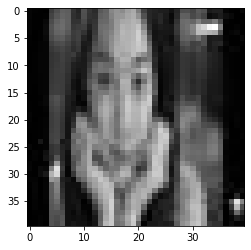

image1.png 파일로 예측한 결과는 pikachu입니다.


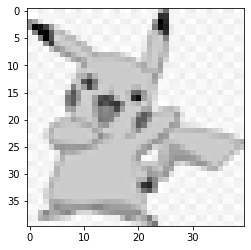

In [160]:
im_pre('image1')

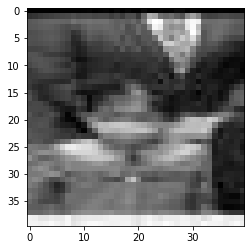

image2.png 파일로 예측한 결과는 happy입니다.


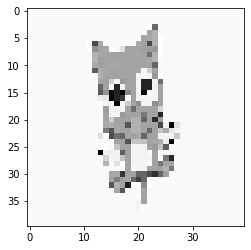

In [161]:
im_pre('image2')

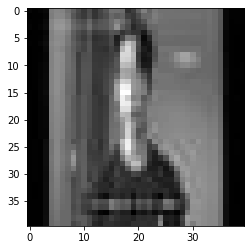

image3.png 파일로 예측한 결과는 pikachu입니다.


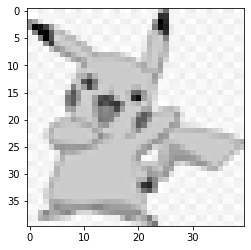

In [162]:
im_pre('image3')

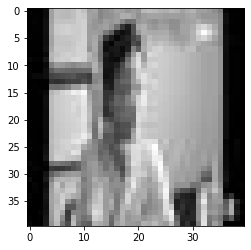

image4.png 파일로 예측한 결과는 pikachu입니다.


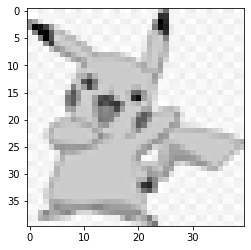

In [163]:
im_pre('image4')

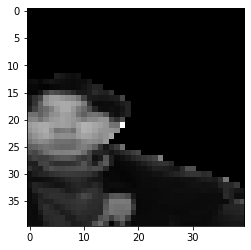

cgy.png 파일로 예측한 결과는 nami입니다.


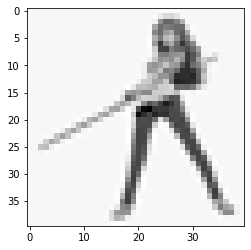

In [140]:
im_pre('cgy')

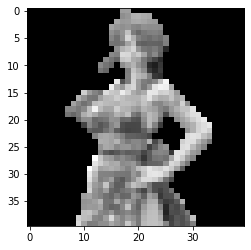

te_nami1.png 파일로 예측한 결과는 pikachu입니다.


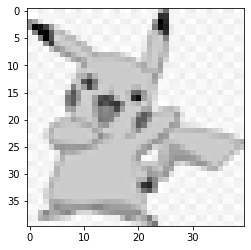

In [141]:
im_pre('te_nami1')

In [ ]:
Image.open('C:/machinelearning/project2/nami/nami0.png')save('C:/machinelearning/project2/'+charname+'/'+'te_'+imagefile+'.png')

In [150]:
# 저장한 사진으로 예측값 구하기 함수
def im_pre2(charname,imagefile):
    #Image.open('C:/machinelearning/project2/'+charname+'/'+imagefile+'.png')

    # 그림 그래프 그리기
    im_size=cv2.imread('C:/machinelearning/project2/'+charname+'/'+imagefile+'.png')
    black=cv2.cvtColor(im_size,cv2.COLOR_BGR2GRAY)
    plt.imshow(black,cmap='gray')
    plt.show()

    result=target_uni[logicreg.predict(black.reshape(1,-1))[0]]
    print(f"{imagefile}.png 파일로 예측한 결과는 {result}입니다.")

    img=cv2.imread('C:/machinelearning/project2/'+result+'/'+imagefile+'.png')
    black=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(black,cmap='gray')
    plt.show()

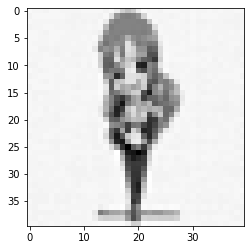

nami3.png 파일로 예측한 결과는 nami입니다.


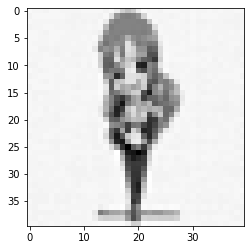

In [154]:
im_pre2('nami','nami3')

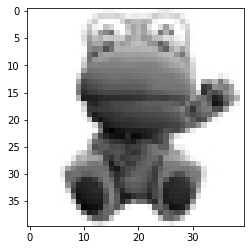

crong6.png 파일로 예측한 결과는 crong입니다.


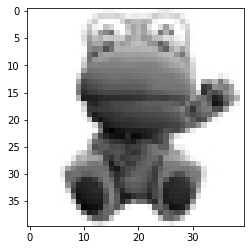

In [168]:
im_pre2('crong','crong6')